# Face Recognition Project

## Processing AgeDB Dataset

### AgeDB dataset

From: https://paperswithcode.com/dataset/agedb

"AgeDB contains 16, 488 images of various famous people, such as actors/actresses, writers, scientists, politicians, etc. Every image is annotated with respect to the identity, age and gender attribute. There exist a total of 568 distinct subjects. The average number of images per subject is 29. The minimum and maximum age is 1 and 101, respectively. The average age range for each subject is 50.3 years."

### Access

The dataset is only avaliable for non-commercial research purposes.

The data didn't included any metadata, but since every image was namned "ImageID_Name_Age_Gender" we can create our own metadata. 

Creating a .txt file with all the file names by running "ls >> AgeDB_meta.txt". 

### Requirements

Up to now, the only needed files/folders is one folder with all images (the data) and one txt-file with all the filenames.

#### Creating metadata as two dataframes

AgeDB_Dataframe_Images - A dataframe that holds information of each image

AgeDB_Dataframe_Individual - A dataframe that holds information of each individual person

In [1]:
import numpy as np
import pandas as pd


# Reading file
with open('MetaData/AgeDB_meta.txt') as f:
    lines = f.read().splitlines()

# Create a list of lists that include all info from the name of the image
image_info_list = [[int(lines[i].split("_")[0]), str(lines[i].split("_")[1]), int(lines[i].split("_")[2]), str(lines[i].split("_")[3][:-4])] for i in range(len(lines))] 

Names = []
Ages = []
Gender = []

for image_info in image_info_list:
    
    individual_age = image_info[2]

    individual_name = image_info[1]


    if image_info[3] == 'f':
        individual_gender = 0
    else:
        individual_gender = 1

    Names.append(individual_name)
    Ages.append(individual_age)
    Gender.append(individual_gender)




# Creating a dictionary to map each person to an individual ID
dict_name_ID = {}

person_ID = 0

for j in range(len(Names)):
    if Names[j] in dict_name_ID.keys():
        pass
    else:
        dict_name_ID[Names[j]] = person_ID
        person_ID += 1

def get_key(val):
    for key, value in dict_name_ID.items():
        if val == value:
            return key
 
    return "key doesn't exist"



# Mapping each image to the person ID
ID_list_not_unique = []

for k in Names:
    id_number = dict_name_ID[k]
    ID_list_not_unique.append(int(id_number))



# Creating the dataframe that holds information of each image
filename_image = lines

AgeDB_ImageData = {"ID" : ID_list_not_unique, 
            "File Name" : filename_image,
            "Name" : Names,
            "Age" : Ages,
            "Gender": Gender}

AgeDB_Dataframe_Images = pd.DataFrame(AgeDB_ImageData)
AgeDB_Dataframe_Images.sort_values(by=['ID'], inplace=True)
AgeDB_Dataframe_Images = AgeDB_Dataframe_Images.reset_index(drop=True)



# Adding a column for each age range
# Create age-range function
def age_range_func(x):
    
    if x <= 10:
        return '0-10'
    elif x <= 20:
        return '11-20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    else:
        return '70+'

#Adding column
AgeDB_Dataframe_Images["Age Range"] = AgeDB_Dataframe_Images["Age"].apply(age_range_func)
AgeDB_Dataframe_Images


,ID,File Name,Name,Age,Gender,Age Range
0,0,0_MariaCallas_35_f.jpg,MariaCallas,35,0,31-40
1,0,12_MariaCallas_37_f.jpg,MariaCallas,37,0,31-40
2,0,13_MariaCallas_53_f.jpg,MariaCallas,53,0,51-60
3,0,14_MariaCallas_32_f.jpg,MariaCallas,32,0,31-40
4,0,15_MariaCallas_42_f.jpg,MariaCallas,42,0,41-50
...,...,...,...,...,...,...
16483,566,9971_ElkeSommer_62_f.jpg,ElkeSommer,62,0,61-70
16484,566,9972_ElkeSommer_63_f.jpg,ElkeSommer,63,0,61-70
16485,566,9973_ElkeSommer_64_f.jpg,ElkeSommer,64,0,61-70
16486,566,9975_ElkeSommer_67_f.jpg,ElkeSommer,67,0,61-70


In [2]:
AgeDB_Dataframe_Images.loc[AgeDB_Dataframe_Images["Name"] == "MariaCallas"]

,ID,File Name,Name,Age,Gender,Age Range
0,0,0_MariaCallas_35_f.jpg,MariaCallas,35,0,31-40
1,0,12_MariaCallas_37_f.jpg,MariaCallas,37,0,31-40
2,0,13_MariaCallas_53_f.jpg,MariaCallas,53,0,51-60
3,0,14_MariaCallas_32_f.jpg,MariaCallas,32,0,31-40
4,0,15_MariaCallas_42_f.jpg,MariaCallas,42,0,41-50
5,0,16_MariaCallas_34_f.jpg,MariaCallas,34,0,31-40
6,0,17_MariaCallas_33_f.jpg,MariaCallas,33,0,31-40
7,0,18_MariaCallas_47_f.jpg,MariaCallas,47,0,41-50
8,0,19_MariaCallas_30_f.jpg,MariaCallas,30,0,21-30
9,0,1_MariaCallas_40_f.jpg,MariaCallas,40,0,31-40


In [3]:
# Create one DataFrame with all information of each person 
# With following columns:
# ID, Min Age, Max Age, Average Age, Age Span, Number of Age Ranges, Number of Images, Gender

# Creating a funciton so we can reuse it later on

def creating_individual_dataframe(df_image):
    """
        Creating a dataframe with information of each person from a dataframe (called "df_image") that holds information of each image. 

        Criteria: The dataframe df_image needs to have colums 
            ID: Specific ID for each person
            File Name: The filename of the image
            Name: Name of the person
            Age: Ground truth age of the person
            Gender: 0 if female and 1 if male
            Age Range: One of the ranges 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 70+
    """

    ID_indiv = list(np.unique(np.array(df_image["ID"])))
    #number_of_indiv = len(ID_indiv)

    MinAge = []
    MaxAge = []
    AgeSpan = []
    NumAgeRanges = []
    NumImages = []
    Name_List_Unique = []
    Gender_Unique = []

    for i in ID_indiv:
        
        ages = np.array(df_image.loc[df_image["ID"] == i, "Age"])
        gender_indiv = np.array(df_image.loc[df_image["ID"] == i, "Gender"])
        name_unique = np.unique(np.array(df_image.loc[df_image["ID"] == i, "Name"]))[0]

        max_age = np.max(ages)
        min_age = np.min(ages)
        number_of_images = len(ages)
        
        MinAge.append(min_age)
        MaxAge.append(max_age)
        AgeSpan.append(max_age - min_age)
        NumImages.append(number_of_images)
        Name_List_Unique.append(name_unique)
        
        NumAgeRanges.append(len(np.unique(np.array(df_image.loc[df_image["ID"] == i, "Age Range"]))))

        # We are taking the average of each gender if the gender isn't the "ground-truth" we will detect noice if gender equals 0.5
        Gender_Unique.append(np.average(gender_indiv))


    # Create Individual DataFrame

    data_indiv = {"ID" : ID_indiv,
                "Name" : Name_List_Unique,
                "Min Age" : MinAge,
                "Max Age" : MaxAge,
                "Age Span" : AgeSpan,
                "Number of Age Ranges" : NumAgeRanges,
                "Number of Images" : NumImages,
                "Gender": Gender_Unique}
            
    df_individual = pd.DataFrame(data_indiv)
    
    return df_individual

AgeDB_Dataframe_Individual = creating_individual_dataframe(AgeDB_Dataframe_Images)
AgeDB_Dataframe_Individual

,ID,Name,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,MariaCallas,26,53,27,4,24,0.0
1,1,GlennClose,18,62,44,5,22,0.0
2,2,GoldieHawn,23,65,42,5,26,0.0
3,3,StephenHawking,1,67,66,7,25,1.0
4,4,HelenHunt,10,51,41,6,38,0.0
...,...,...,...,...,...,...,...,...
562,562,LauraDern,12,43,31,4,23,0.0
563,563,CarlSagan,20,60,40,5,13,1.0
564,564,RoseMarie,30,88,58,6,20,0.0
565,565,AliMacGraw,25,74,49,6,34,0.0


### Different scale on each picture

We don't want to resize each image, since we will change the shape of each face.

Note that we can adjust each 'app' to the specific image size.

### Find valid images and reduce noice

Only want images with one person and images that insightface can process (in other words find a face)

In [6]:
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from PIL import Image

def valid_faces_insightface(df_images, path_to_data):

    """
    Creating a dataframe on the same form as df_images but only with images included ONE person and images that insightface can recognize. 
    """

    model = 'buffalo_l'

    imageList = df_images["File Name"].to_list()
    
    found_images_list = []

    for i in range(len(imageList)):
        
        try:
            open_image = Image.open(path_to_data + str(imageList[i]))
            image_size = open_image.size
            app = FaceAnalysis(name=model)
            app.prepare(ctx_id=0, det_size=(image_size[0], image_size[1]))
            
            # We need to delete .jpg in order to run insightface
            image_name = imageList[i][:-4]
            
            path_to_image = path_to_data + str(image_name)
            print(path_to_image)

            image = ins_get_image(path_to_image)
            
            faces = app.get(image)

            features = []
            for face in faces:
                features.append(face.normed_embedding)

            if len(features) == 1:
                found_images_list.append(image_name)
        except FileNotFoundError:
            pass

    

    # Creating a dataframe for all images that we have identify one and only one face
    rows_df = []

    for found_face in found_images_list:
        filename_found_face = str(found_face) + str('.jpg')
        row = df_images[df_images['File Name'] == filename_found_face]
        rows_df.append(row)

    df_found_faces = pd.concat(rows_df)

    return df_found_faces


# Approximated runtime 130min
AgeDB_Dataframe_FoundFaces_Images =  valid_faces_insightface(AgeDB_Dataframe_Images, 'Images/AgeDB/')
AgeDB_Dataframe_FoundFaces_Images

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ivarbl/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ivarbl/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ivarbl/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ivarbl/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ivarbl/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

AssertionError: Images/AgeDB/12_MariaCallas_37_f.jpg not found

In [100]:
# Creating an individual dataframe from the all the found faces.

AgeDB_Dataframe_FoundFaces_Individual = creating_individual_dataframe(AgeDB_Dataframe_FoundFaces_Images)
AgeDB_Dataframe_FoundFaces_Individual

,ID,Name,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,MariaCallas,26,53,27,4,24,0.0
1,1,GlennClose,18,62,44,5,22,0.0
2,2,GoldieHawn,23,65,42,5,26,0.0
3,3,StephenHawking,1,67,66,7,25,1.0
4,4,HelenHunt,10,51,41,6,38,0.0
...,...,...,...,...,...,...,...,...
562,562,LauraDern,12,43,31,4,23,0.0
563,563,CarlSagan,20,60,40,5,13,1.0
564,564,RoseMarie,30,88,58,6,20,0.0
565,565,AliMacGraw,25,74,49,6,34,0.0


### Part-time result 

From the above result we can see that we found pictures from all individual BUT we lost 79 images, might be that insightface didn't catch the face or multiple faces in one single picture.

### Preferred characteristics

In this project we would like to analyze how the face recognition algorithm performs when analyze two picture of the same person but where there is a large age gap. Because of that we need a person that appears in multiple age ranges and has several images available in the dataset.

If we can find such combination we could then analyze the similarity between two pictures both in the same age range and across different age ranges.

In [102]:
def createDataFrame(x,y, df_images, df_individual):
    """
    Creating a DataFrame with individual people that appers in at least x number of age ranges 
    and has y number of images. Note that it is based on the original DataFrame 'df_casia'
    """

    ID_list = list(df_individual.loc[(df_individual["Number of Age Ranges"] >= x) & (df_individual["Number of Images"] >= y), "ID"])

    if len(ID_list) == 0:
        return 'No images found with specific conditions'
    
    else:
        
        tempDataFrame = df_images[df_images["ID"] == ID_list[0]]
        
        if len(ID_list) == 1:
            
            return tempDataFrame.reset_index(drop=True)
        
        else:
            
            frames = [tempDataFrame]
            
            for i in ID_list[1:]:
                df_to_join = df_images[df_images["ID"] == i]
                frames.append(df_to_join)
            
            result = pd.concat(frames)
            return result.reset_index(drop=True)

In [103]:
# Check if person are labeled with different genders
#print(np.unique(np.array(AgeDB_Dataframe_FoundFaces_Individual["Gender"].to_list())))

# Find ID's where gender-list equal 0.5

ID_indiv = list(np.array(AgeDB_Dataframe_FoundFaces_Individual["ID"]))
ID_possible_noise = []

for i in ID_indiv:
    ID_gender_list = np.array(AgeDB_Dataframe_FoundFaces_Images.loc[AgeDB_Dataframe_FoundFaces_Images["ID"] == i, "Gender"])
    ID_average_gender = np.average(ID_gender_list)
    
    if ID_average_gender not in [0,1]:
        ID_possible_noise.append(i)

duplicate_list = []
for i in ID_possible_noise:

    temp_duplicate = list(np.array(AgeDB_Dataframe_FoundFaces_Images.loc[AgeDB_Dataframe_FoundFaces_Images["ID"] == i, "File Name"]))


    # Manual check: Frances Dee, Joan Lorring, Gladys Cooper is female and Roy Scheider, Tom Jones is male.
    for j in temp_duplicate:
        temp_image_split = j.split("_")
        
        if (temp_image_split[1] == 'FrancesDee') and (temp_image_split[3][0] == 'm'):
            duplicate_list.append(j)
        
        elif (temp_image_split[1] == 'JoanLorring') and (temp_image_split[3][0] == 'm'):
            duplicate_list.append(j)

        elif (temp_image_split[1] == 'GladysCooper') and (temp_image_split[3][0] == 'm'):
            duplicate_list.append(j)

        elif (temp_image_split[1] == 'RoyScheider') and (temp_image_split[3][0] == 'f'):
            duplicate_list.append(j)
    
        elif (temp_image_split[1] == 'TomJones') and (temp_image_split[3][0] == 'f'):
            duplicate_list.append(j)

    


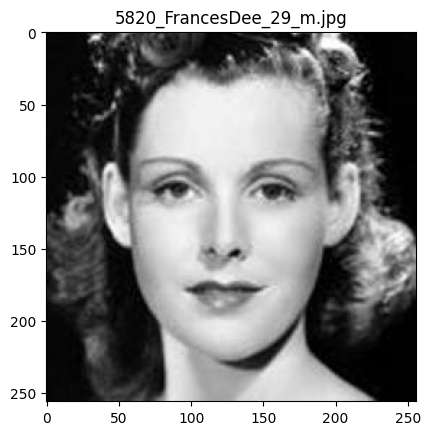

In [104]:
# After looking at the images we can see that images are duplicate. In order to get a more accurate result we need to delete the duplicates

# Example '5820_FrancesDee_29_m.jpg' and '12598_FrancesDee_29_f.jpg' 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

example_one = mpimg.imread('/Users/ivarblohm/Documents/Skola/Uppsala_Universitet/2022/ProjectFaceRec.nosync/AgeDB_resized/5820_FrancesDee_29_m.jpg')

plt.title("5820_FrancesDee_29_m.jpg")
plt.imshow(example_one)
plt.show()




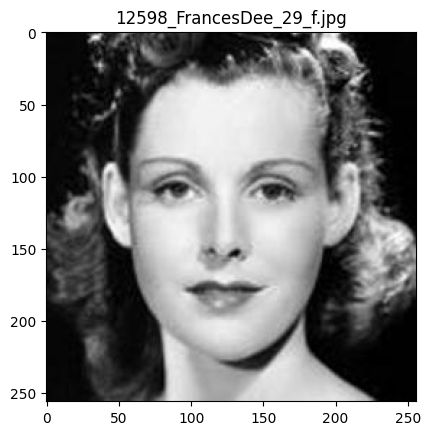

In [105]:
example_two = mpimg.imread('/Users/ivarblohm/Documents/Skola/Uppsala_Universitet/2022/ProjectFaceRec.nosync/AgeDB_resized/12598_FrancesDee_29_f.jpg')

plt.title("12598_FrancesDee_29_f.jpg")
plt.imshow(example_two)
plt.show()


In [106]:
# Delete duplicates

for dup_image in duplicate_list:
    AgeDB_Dataframe_FoundFaces_Images.drop(AgeDB_Dataframe_FoundFaces_Images[AgeDB_Dataframe_FoundFaces_Images['File Name'] == dup_image].index, inplace = True)

AgeDB_Dataframe_FoundFaces_Images = AgeDB_Dataframe_FoundFaces_Images.reset_index(drop=True)
AgeDB_Dataframe_FoundFaces_Images


,ID,File Name,Name,Age,Gender,Age Range
0,0,0_MariaCallas_35_f.jpg,MariaCallas,35,0,31-40
1,0,12_MariaCallas_37_f.jpg,MariaCallas,37,0,31-40
2,0,13_MariaCallas_53_f.jpg,MariaCallas,53,0,51-60
3,0,14_MariaCallas_32_f.jpg,MariaCallas,32,0,31-40
4,0,15_MariaCallas_42_f.jpg,MariaCallas,42,0,41-50
...,...,...,...,...,...,...
16272,566,9971_ElkeSommer_62_f.jpg,ElkeSommer,62,0,61-70
16273,566,9972_ElkeSommer_63_f.jpg,ElkeSommer,63,0,61-70
16274,566,9973_ElkeSommer_64_f.jpg,ElkeSommer,64,0,61-70
16275,566,9975_ElkeSommer_67_f.jpg,ElkeSommer,67,0,61-70


In [107]:
# Updating the individual dataframe 

AgeDB_Dataframe_FoundFaces_Individual = creating_individual_dataframe(AgeDB_Dataframe_FoundFaces_Images)
AgeDB_Dataframe_FoundFaces_Individual

,ID,Name,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,MariaCallas,26,53,27,4,24,0.0
1,1,GlennClose,18,62,44,5,22,0.0
2,2,GoldieHawn,23,65,42,5,26,0.0
3,3,StephenHawking,1,67,66,7,25,1.0
4,4,HelenHunt,10,51,41,6,38,0.0
...,...,...,...,...,...,...,...,...
562,562,LauraDern,12,43,31,4,23,0.0
563,563,CarlSagan,20,60,40,5,13,1.0
564,564,RoseMarie,30,88,58,6,20,0.0
565,565,AliMacGraw,25,74,49,6,34,0.0


In [108]:
## Creating a subset of people that appears in more than x ranges and have more than y images

sum((AgeDB_Dataframe_FoundFaces_Individual["Number of Age Ranges"] >= 3) & (AgeDB_Dataframe_FoundFaces_Individual["Number of Images"] >= 30))

272

In [109]:
# Creating a valid subset of the data. Included persons with minimum 3 age ranges and 30 images

AgeDB_Dataframe_FoundFaces_Images = createDataFrame(3,30, AgeDB_Dataframe_FoundFaces_Images, AgeDB_Dataframe_FoundFaces_Individual)
AgeDB_Dataframe_FoundFaces_Images

,ID,File Name,Name,Age,Gender,Age Range
0,4,10053_HelenHunt_39_f.jpg,HelenHunt,39,0,31-40
1,4,10052_HelenHunt_38_f.jpg,HelenHunt,38,0,31-40
2,4,10046_HelenHunt_34_f.jpg,HelenHunt,34,0,31-40
3,4,10051_HelenHunt_37_f.jpg,HelenHunt,37,0,31-40
4,4,10050_HelenHunt_37_f.jpg,HelenHunt,37,0,31-40
...,...,...,...,...,...,...
9823,566,9971_ElkeSommer_62_f.jpg,ElkeSommer,62,0,61-70
9824,566,9972_ElkeSommer_63_f.jpg,ElkeSommer,63,0,61-70
9825,566,9973_ElkeSommer_64_f.jpg,ElkeSommer,64,0,61-70
9826,566,9975_ElkeSommer_67_f.jpg,ElkeSommer,67,0,61-70


In [110]:
# Updating the individual dataframe 

AgeDB_Dataframe_FoundFaces_Individual = creating_individual_dataframe(AgeDB_Dataframe_FoundFaces_Images)
AgeDB_Dataframe_FoundFaces_Individual

,ID,Name,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,4,HelenHunt,10,51,41,6,38,0.0
1,5,JaneBirkin,19,68,49,6,39,0.0
2,6,PaulAnka,15,72,57,7,42,1.0
3,7,JaneFonda,25,74,49,6,30,0.0
4,14,MarietteHartley,21,73,52,6,33,0.0
...,...,...,...,...,...,...,...,...
267,556,MegRyan,7,77,70,7,34,0.0
268,557,DorisDay,17,82,65,7,49,0.0
269,559,JaneAsher,6,67,61,7,34,0.0
270,565,AliMacGraw,25,74,49,6,34,0.0


In [111]:
# Saving work so we don't lose anything
AgeDB_Dataframe_FoundFaces_Images.to_csv("createdCSV/AgeDB_Cleaned_Images.csv")
AgeDB_Dataframe_FoundFaces_Individual.to_csv("createdCSV/AgeDB_Cleaned_Individual.csv")

In [2]:
import socket
print(socket.gethostname())

rackham2.uppmax.uu.se
